**Task 1: Data Overview
Objective: Understand the dataset structure**

In [ ]:
import pandas as pd

#Load the dataset

file_path = '/mnt/data/Data_set 2 - Copy.csv'
df = pd.read_csv('/content/Data_set 2 - Copy.csv')

#information from the dataset

df_info = df.info()

#Display row

df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

(None,
    gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
 0  Female   34                Yes             1              2           5   
 1  Female   23                Yes             4              3           2   
 2    Male   30                Yes             3              6           4   
 3    Male   22                Yes             2              1           3   
 4  Female   24                 No             2              1           3   
 
    Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
 0                 3               7    6     4  ...          1-3 years   
 1                 1               5    6     7  ...  More than 5 years   
 2                 2               5    1     7  ...          3-5 years   
 3                 7               6    4     5  ...   Less than 1 year   
 4                 6               4    5     7  ...   Less than 1 year   
 
   Invest_Monitor   Expect       Avenue What are your savings obj

**Task 2: Gender Distribution
Objective: Visualize gender distribution in
the dataset.**

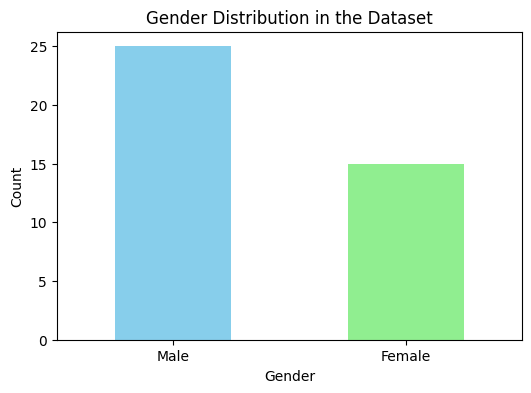

In [ ]:
import matplotlib.pyplot as plt

# Extract gender information

gender_counts = df['gender'].value_counts()

# Create a bar chart for gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Task 3: Descriptive Statistics
Objective: Present basic statistics for
numerical columns**

In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate descriptive statistics: mean, median, and standard deviation

descriptive_stats = numerical_columns.agg(['mean', 'median', 'std'])

descriptive_stats


,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
median,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263


**Task 4: Most Preferred Investment
Avenue
Objective: Identify the most preferred
investment avenue**

The most preferred investment avenue is: Yes


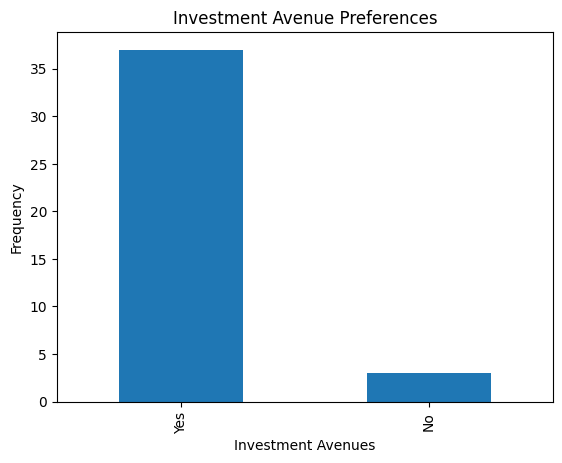

In [ ]:
# Extract the 'Investment_Avenues' column
avenue_counts = df['Investment_Avenues'].value_counts()

# Display the most preferred investment avenue
most_preferred = avenue_counts.idxmax()
print(f"The most preferred investment avenue is: {most_preferred}")

# Optional: Visualize the distribution
avenue_counts.plot(kind='bar', title='Investment Avenue Preferences')
plt.xlabel('Investment Avenues')
plt.ylabel('Frequency')
plt.show()


**Task 5: Reasons for Investment
Objective: Analyze and summarize reasons
for investment choices.**

In [ ]:
# Extract all reason columns
reason_columns = ['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']
all_reasons = df[reason_columns].values.flatten()

# Convert to DataFrame for easier analysis
reasons_df = pd.DataFrame(all_reasons, columns=['Reason'])

# Group by reason and count occurrences
reason_counts = reasons_df['Reason'].value_counts()
print(reason_counts)

# Optional: Categorize into themes manually based on content analysis


Reason
Capital Appreciation    30
Assured Returns         26
Better Returns          24
Risk Free               19
Fixed Returns           18
Safe Investment         13
Fund Diversification    13
Dividend                 8
High Interest Rates      3
Tax Benefits             3
Liquidity                2
Tax Incentives           1
Name: count, dtype: int64


**Task 6: Savings Objectives
Objective: Identify and present main
savings objectives**

Main Savings Objectives:
 What are your savings objectives?
Retirement Plan    24
Health Care        13
Education           3
Name: count, dtype: int64


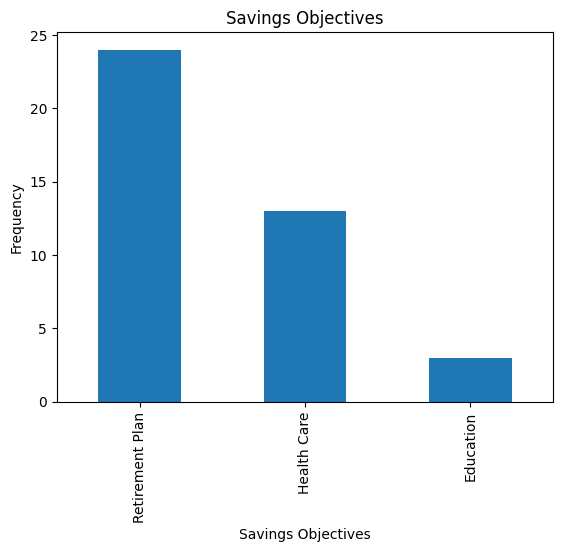

In [ ]:
# Extract the 'savings objectives' column
savings_objectives = df['What are your savings objectives?']

# Count occurrences of each unique objective
objective_counts = savings_objectives.value_counts()

# Print the summary
print("Main Savings Objectives:\n", objective_counts)

# Optional: Visualize with a bar chart
objective_counts.plot(kind='bar', title='Savings Objectives')
plt.xlabel('Savings Objectives')
plt.ylabel('Frequency')
plt.show()


**Task 7: Common Information Sources
Objective: Analyze common sources participants
rely on for investment information.**

1. Explore Information Sources Column: Review
the column where participants indicated their
sources of investment information.

2. Identify Common Sources: Analyze the data to
identify and summarize the most common
sources participants rely on.

Common Information Sources:
 Source
Financial Consultants       16
Newspapers and Magazines    14
Television                   6
Internet                     4
Name: count, dtype: int64


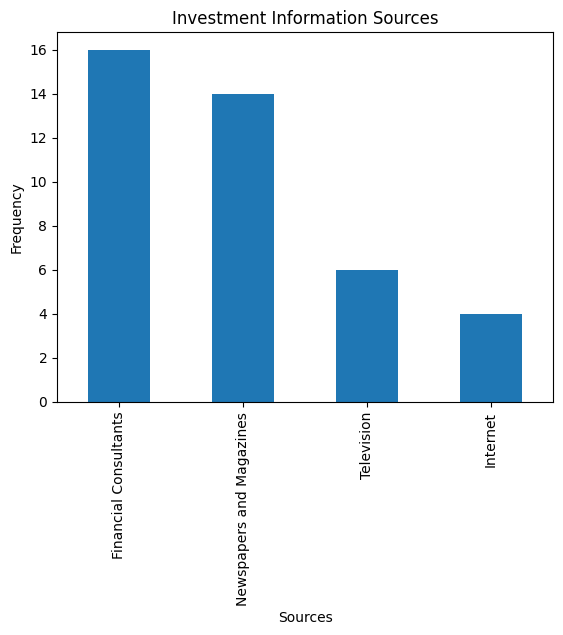

In [ ]:
# Extract the 'Source' column
info_sources = df['Source']

# Count occurrences of each unique source
source_counts = info_sources.value_counts()

# Print the summary
print("Common Information Sources:\n", source_counts)

# Optional: Visualize with a bar chart
source_counts.plot(kind='bar', title='Investment Information Sources')
plt.xlabel('Sources')
plt.ylabel('Frequency')
plt.show()


**Task 8: Investment Duration
Objective: Calculate the average investment
duration.**

1. Analyze Investment Duration Column:
Examine the column containing information
about participants' investment durations.

2. Calculate Average Duration: Use
appropriate statistical methods to calculate
the average investment duration.

In [ ]:
# Map duration categories to numerical values (in years)
duration_mapping = {
    'Less than 1 year': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    'More than 5 years': 6  # or another estimate
}

# Apply the mapping to the 'Duration' column
df['Duration_Numeric'] = df['Duration'].map(duration_mapping)

# Calculate the average duration
average_duration = df['Duration_Numeric'].mean()
print(f"The average investment duration is approximately {average_duration:.2f} years.")


The average investment duration is approximately 2.98 years.


**Task 9: Expectations from Investments
Objective: Summarize participants' expectations
from investments**

Participants' Investment Expectations:
 Expect
20%-30%    32
30%-40%     5
10%-20%     3
Name: count, dtype: int64


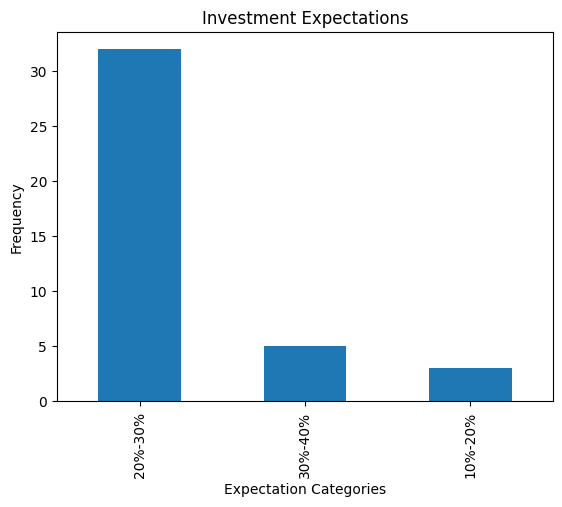

In [ ]:
# Extract the 'Expect' column
expectations = df['Expect']

# Count occurrences of each unique expectation
expectation_counts = expectations.value_counts()

# Print the summary
print("Participants' Investment Expectations:\n", expectation_counts)

# Optional: Visualize with a bar chart
expectation_counts.plot(kind='bar', title='Investment Expectations')
plt.xlabel('Expectation Categories')
plt.ylabel('Frequency')
plt.show()


**Task 10: Correlation Analysis
Objective: Explore potential correlations
between factors**

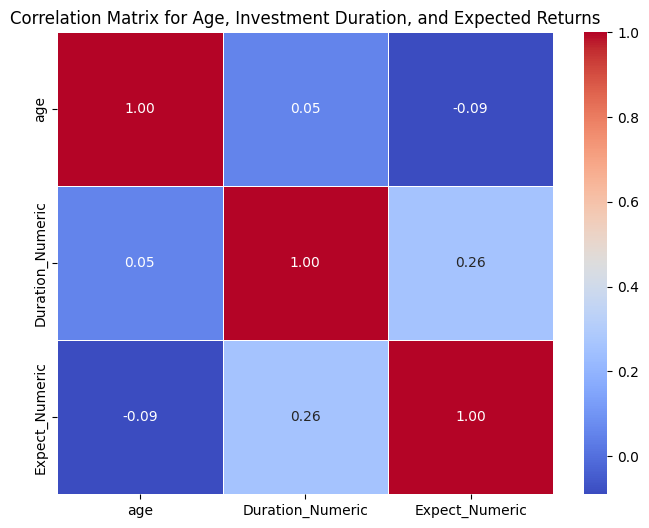

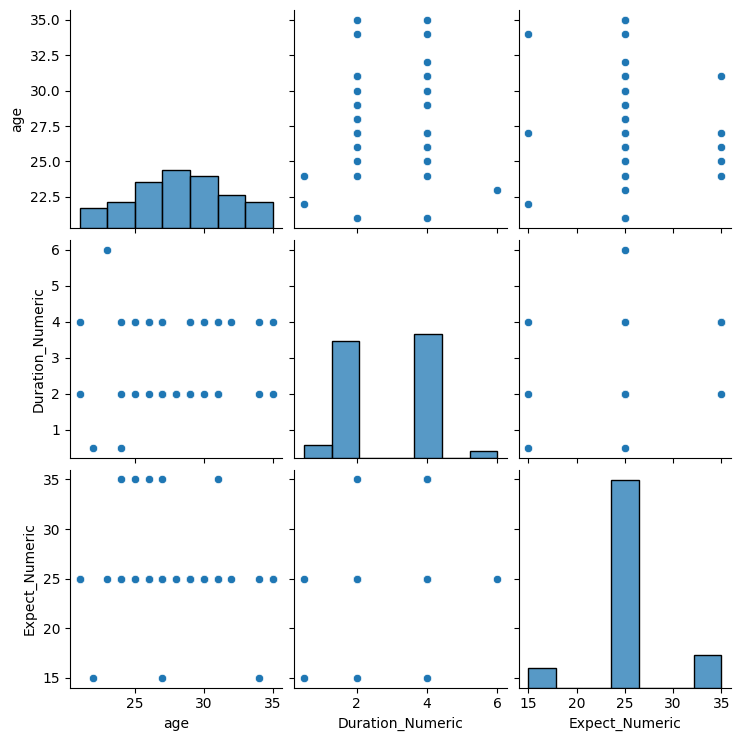

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that all relevant columns are numeric
# Assuming 'Duration_Numeric' already created, we may also map 'Expect' to numeric

expectation_mapping = {'10%-20%': 15, '20%-30%': 25, '30%-40%': 35, 'More than 40%': 45}
df['Expect_Numeric'] = df['Expect'].map(expectation_mapping)

# Select numerical columns for correlation
corr_columns = ['age', 'Duration_Numeric', 'Expect_Numeric']

# Calculate correlation matrix
correlation_matrix = df[corr_columns].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Age, Investment Duration, and Expected Returns')
plt.show()

# Optional: Scatter plots to visualize relationships
sns.pairplot(df[corr_columns])
plt.show()
